In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import numpy as np

In [121]:
df = pd.read_csv('SBAnational.csv')

/var/folders/tk/mz69hv3d2832sf7c8tcthp_00000gp/T/ipykernel_12000/2640212651.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


In [123]:
df.info()
#900k entries, 27 cols, variety of qualitative and quantitative data,
#lots of nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [5]:
#quick check of data
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [6]:
#remove nulls
df.isna().sum()


LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [7]:
#over 700k nulls, just drop
df = df.drop(['ChgOffDate'], axis=1)

In [8]:
#drop nulls
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886240 entries, 0 to 899163
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      886240 non-null  int64  
 1   Name               886240 non-null  object 
 2   City               886240 non-null  object 
 3   State              886240 non-null  object 
 4   Zip                886240 non-null  int64  
 5   Bank               886240 non-null  object 
 6   BankState          886240 non-null  object 
 7   NAICS              886240 non-null  int64  
 8   ApprovalDate       886240 non-null  object 
 9   ApprovalFY         886240 non-null  object 
 10  Term               886240 non-null  int64  
 11  NoEmp              886240 non-null  int64  
 12  NewExist           886240 non-null  float64
 13  CreateJob          886240 non-null  int64  
 14  RetainedJob        886240 non-null  int64  
 15  FranchiseCode      886240 non-null  int64  
 16  UrbanRu

In [10]:
#change data types
df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)
df['DisbursementGross'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)
df['BalanceGross'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
df['DisbursementGross'] = df['DisbursementGross'].astype(int) 
df['NewExist'].value_counts()

NewExist
1.0    636139
2.0    249080
0.0      1021
Name: count, dtype: int64

In [12]:
remap_dict = {
    0.0: 'Unknown',
    1.0: 'Existing',
    2.0: 'New'
}

df['NewExist'] = df['NewExist'].replace(remap_dict)


In [13]:
#drop unecessary cols
df = df.drop(['City','LoanNr_ChkDgt', 'BankState', 
              'Name', 'Zip', 'Bank', 'CreateJob', 'RetainedJob', 
              'BalanceGross', 'GrAppv', 'SBA_Appv'], axis=1)

In [14]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr
0,IN,451120,28-Feb-97,1997,84,4,New,1,0,N,Y,28-Feb-99,48000,P I F,0.0
1,IN,722410,28-Feb-97,1997,60,2,New,1,0,N,Y,31-May-97,32000,P I F,0.0
2,IN,621210,28-Feb-97,1997,180,7,Existing,1,0,N,N,31-Dec-97,215250,P I F,0.0
3,OK,0,28-Feb-97,1997,60,2,Existing,1,0,N,Y,30-Jun-97,28000,P I F,0.0
4,FL,0,28-Feb-97,1997,240,14,Existing,1,0,N,N,14-May-97,229000,P I F,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,OH,451120,27-Feb-97,1997,60,6,Existing,1,0,0,N,30-Sep-97,56000,P I F,0.0
899160,OH,451130,27-Feb-97,1997,60,6,Existing,1,0,Y,N,31-Oct-97,42500,P I F,0.0
899161,CA,332321,27-Feb-97,1997,108,26,Existing,1,0,N,N,30-Sep-97,225000,P I F,0.0
899162,HI,0,27-Feb-97,1997,60,6,Existing,1,0,N,Y,31-Mar-97,60000,CHGOFF,46383.0


In [15]:
df['LowDoc'].value_counts()

LowDoc
N    775189
Y    107894
0      1236
C       756
S       598
A       492
R        74
1         1
Name: count, dtype: int64

In [16]:
#keep only cols with n, y, 0, 1
df.loc[:, 'LowDoc'] = df['LowDoc'].map({'N': 0, 'Y': 1, '0': 0, '1': 1})

In [17]:
df['LowDoc'].value_counts()


LowDoc
0.0    776425
1.0    107895
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886240 entries, 0 to 899163
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              886240 non-null  object 
 1   NAICS              886240 non-null  int64  
 2   ApprovalDate       886240 non-null  object 
 3   ApprovalFY         886240 non-null  object 
 4   Term               886240 non-null  int64  
 5   NoEmp              886240 non-null  int64  
 6   NewExist           886240 non-null  object 
 7   FranchiseCode      886240 non-null  int64  
 8   UrbanRural         886240 non-null  int64  
 9   RevLineCr          886240 non-null  object 
 10  LowDoc             884320 non-null  object 
 11  DisbursementDate   886240 non-null  object 
 12  DisbursementGross  886240 non-null  int64  
 13  MIS_Status         886240 non-null  object 
 14  ChgOffPrinGr       886240 non-null  float64
dtypes: float64(1), int64(6), object(8)
memory usage: 108.2+ 

In [19]:
#keep only cols with n, y, 0, 1
df = df[df['RevLineCr'].isin(['N', 'Y', '0', '1'])]

df['RevLineCr'].value_counts()



RevLineCr
N    415439
0    257363
Y    198267
1        23
Name: count, dtype: int64

In [20]:
#keep only cols with n, y, 0, 1
df.loc[:, 'RevLineCr'] = df['RevLineCr'].map({'N': 0, 'Y': 1, '0': 0, '1':1})
df['RevLineCr'].value_counts()


RevLineCr
0    672802
1    198290
Name: count, dtype: int64

In [21]:
#change 1976A to normal
#change data type to int

def changeDate(date):
    if date == '1976A':
        date = 1976

df['ApprovalFY'].apply(changeDate)
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

In [22]:
#changing data type
df['ApprovalFY'] = df['ApprovalFY'].replace({
    '1976A': '1976'
})
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')
df = df.dropna(subset=['MIS_Status'])

/var/folders/tk/mz69hv3d2832sf7c8tcthp_00000gp/T/ipykernel_12000/3040314148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ApprovalFY'] = df['ApprovalFY'].replace({
/var/folders/tk/mz69hv3d2832sf7c8tcthp_00000gp/T/ipykernel_12000/3040314148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')


In [23]:
#drop col
df = df.drop('FranchiseCode', axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871092 entries, 0 to 899163
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              871092 non-null  object 
 1   NAICS              871092 non-null  int64  
 2   ApprovalDate       871092 non-null  object 
 3   ApprovalFY         871092 non-null  int64  
 4   Term               871092 non-null  int64  
 5   NoEmp              871092 non-null  int64  
 6   NewExist           871092 non-null  object 
 7   UrbanRural         871092 non-null  int64  
 8   RevLineCr          871092 non-null  object 
 9   LowDoc             869181 non-null  object 
 10  DisbursementDate   871092 non-null  object 
 11  DisbursementGross  871092 non-null  int64  
 12  MIS_Status         871092 non-null  object 
 13  ChgOffPrinGr       871092 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 99.7+ MB


In [25]:
# Step 1: Convert NAICS to string (if it's not already) and extract the first two digits
df['NAICS_prefix'] = df['NAICS'].astype(str).str[:2]

# Step 2: Create a mapping dictionary for the first two digits (adjust the mapping as needed)
naics_mapping = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration',
    '0': 'Unclassified',
}

# Step 3: Map the first two digits to the corresponding industry
df['NAICS_US_Industry_Title'] = df['NAICS_prefix'].map(naics_mapping)

In [26]:
#remap to diff regions instead of states
state_to_region = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West', 'CO': 'West',
    'CT': 'Northeast', 'DE': 'Northeast', 'FL': 'South', 'GA': 'South', 'HI': 'West', 
    'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 
    'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South', 'MA': 'Northeast', 
    'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest', 'MT': 'West', 
    'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast', 'NM': 'West', 
    'NY': 'Northeast', 'NC': 'South', 'ND': 'Midwest', 'OH': 'Midwest', 'OK': 'South', 
    'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South', 'SD': 'Midwest', 
    'TN': 'South', 'TX': 'South', 'UT': 'West', 'VT': 'Northeast', 'VA': 'South', 
    'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West', 'DC': 'Northeast'
}

df['Region'] = df['State'].map(state_to_region)

In [27]:
df.isna().sum()

State                         0
NAICS                         0
ApprovalDate                  0
ApprovalFY                    0
Term                          0
NoEmp                         0
NewExist                      0
UrbanRural                    0
RevLineCr                     0
LowDoc                     1911
DisbursementDate              0
DisbursementGross             0
MIS_Status                    0
ChgOffPrinGr                  0
NAICS_prefix                  0
NAICS_US_Industry_Title       0
Region                        0
dtype: int64

In [28]:
#drop rest of nulls
df = df.dropna(subset=['LowDoc'])

In [29]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,NAICS_prefix,NAICS_US_Industry_Title,Region
0,IN,451120,28-Feb-97,1997,84,4,New,0,0,1.0,28-Feb-99,48000,P I F,0.0,45,Retail Trade,Midwest
1,IN,722410,28-Feb-97,1997,60,2,New,0,0,1.0,31-May-97,32000,P I F,0.0,72,Accommodation and Food Services,Midwest
2,IN,621210,28-Feb-97,1997,180,7,Existing,0,0,0.0,31-Dec-97,215250,P I F,0.0,62,Health Care and Social Assistance,Midwest
3,OK,0,28-Feb-97,1997,60,2,Existing,0,0,1.0,30-Jun-97,28000,P I F,0.0,0,Unclassified,South
4,FL,0,28-Feb-97,1997,240,14,Existing,0,0,0.0,14-May-97,229000,P I F,0.0,0,Unclassified,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,OH,451120,27-Feb-97,1997,60,6,Existing,0,0,0.0,30-Sep-97,56000,P I F,0.0,45,Retail Trade,Midwest
899160,OH,451130,27-Feb-97,1997,60,6,Existing,0,1,0.0,31-Oct-97,42500,P I F,0.0,45,Retail Trade,Midwest
899161,CA,332321,27-Feb-97,1997,108,26,Existing,0,0,0.0,30-Sep-97,225000,P I F,0.0,33,Manufacturing,West
899162,HI,0,27-Feb-97,1997,60,6,Existing,0,0,1.0,31-Mar-97,60000,CHGOFF,46383.0,0,Unclassified,West


In [30]:
df.isna().sum()

State                      0
NAICS                      0
ApprovalDate               0
ApprovalFY                 0
Term                       0
NoEmp                      0
NewExist                   0
UrbanRural                 0
RevLineCr                  0
LowDoc                     0
DisbursementDate           0
DisbursementGross          0
MIS_Status                 0
ChgOffPrinGr               0
NAICS_prefix               0
NAICS_US_Industry_Title    0
Region                     0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 869181 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   State                    869181 non-null  object 
 1   NAICS                    869181 non-null  int64  
 2   ApprovalDate             869181 non-null  object 
 3   ApprovalFY               869181 non-null  int64  
 4   Term                     869181 non-null  int64  
 5   NoEmp                    869181 non-null  int64  
 6   NewExist                 869181 non-null  object 
 7   UrbanRural               869181 non-null  int64  
 8   RevLineCr                869181 non-null  object 
 9   LowDoc                   869181 non-null  object 
 10  DisbursementDate         869181 non-null  object 
 11  DisbursementGross        869181 non-null  int64  
 12  MIS_Status               869181 non-null  object 
 13  ChgOffPrinGr             869181 non-null  float64
 14  NAICS_pre

In [32]:
df['NewExist'].value_counts()

NewExist
Existing    623174
New         244996
Unknown       1011
Name: count, dtype: int64

In [33]:
#convert data types
df['RevLineCr'] = df['RevLineCr'].astype(int)
df['LowDoc'] = df['LowDoc'].astype(int)  

In [34]:
print(df.dtypes)


State                       object
NAICS                        int64
ApprovalDate                object
ApprovalFY                   int64
Term                         int64
NoEmp                        int64
NewExist                    object
UrbanRural                   int64
RevLineCr                    int64
LowDoc                       int64
DisbursementDate            object
DisbursementGross            int64
MIS_Status                  object
ChgOffPrinGr               float64
NAICS_prefix                object
NAICS_US_Industry_Title     object
Region                      object
dtype: object


In [35]:
#drop cols
df = df.drop(['State', 'NAICS', 'NAICS_prefix'], axis=1)

In [36]:
#fix date format
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], format='%d-%b-%y')
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'], format='%d-%b-%y')

In [37]:
#creating new cols
df['Loan_Age'] = (pd.to_datetime(df['DisbursementDate']) - 
                  pd.to_datetime(df['ApprovalDate'])).dt.days
df['Term_Years'] = df['Term'] / 12


In [38]:
#removing bad rows
df = df[df['Loan_Age'] >= 0]


In [39]:
df['MIS_Status'].value_counts()

MIS_Status
P I F     719503
CHGOFF    148911
Name: count, dtype: int64

In [40]:
df.loc[:, 'MIS_Status'] = df['MIS_Status'].map({'P I F': 1, 'CHGOFF': 0})
df['MIS_Status'] = df['MIS_Status'].astype(int) 

df['MIS_Status'].value_counts()

MIS_Status
1    719503
0    148911
Name: count, dtype: int64

In [41]:
print(df.dtypes)


ApprovalDate               datetime64[ns]
ApprovalFY                          int64
Term                                int64
NoEmp                               int64
NewExist                           object
UrbanRural                          int64
RevLineCr                           int64
LowDoc                              int64
DisbursementDate           datetime64[ns]
DisbursementGross                   int64
MIS_Status                          int64
ChgOffPrinGr                      float64
NAICS_US_Industry_Title            object
Region                             object
Loan_Age                            int64
Term_Years                        float64
dtype: object


In [42]:
#convert to numbers
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df['DisbursementMonth'] = df['DisbursementDate'].dt.month

df['ApprovalMonth'] = df['ApprovalMonth'].astype('object')  # Convert to object
df['ApprovalMonth'] = df['ApprovalMonth'].map({1: 'Jan', 2: 'Feb',
                                                            3: 'Mar', 4: 'Apr',
                                                            5: 'May', 6: 'Jun',
                                                            7: 'Jul', 8: 'Aug',
                                                            9: 'Sep', 10: 'Oct',
                                                            11: 'Nov', 12: 'Dec'})

df['DisbursementMonth'] = df['DisbursementMonth'].astype('object')  # Convert to object
df['DisbursementMonth'] = df['DisbursementMonth'].map({1: 'Jan', 2: 'Feb',
                                                                    3: 'Mar', 4: 'Apr',
                                                                    5: 'May', 6: 'Jun',
                                                                    7: 'Jul', 8: 'Aug',
                                                                    9: 'Sep', 10: 'Oct',
                                                                    11: 'Nov', 12: 'Dec'})

In [43]:
df = df.drop(['ApprovalDate', 'DisbursementDate', 'ChgOffPrinGr', 'DisbursementMonth'], axis=1)

In [44]:
# Map the categorical values to integers
df['NewExist'] = df['NewExist'].map({'Unknown': 0, 'Existing': 1, 'New': 2})

# Verify the result
print(df['NewExist'].value_counts())

df['NewExist'] = df['NewExist'].astype('int')  


NewExist
1    622606
2    244798
0      1010
Name: count, dtype: int64


In [45]:
df

,ApprovalFY,Term,NoEmp,NewExist,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,NAICS_US_Industry_Title,Region,Loan_Age,Term_Years,ApprovalMonth
0,1997,84,4,2,0,0,1,48000,1,Retail Trade,Midwest,730,7.0,Feb
1,1997,60,2,2,0,0,1,32000,1,Accommodation and Food Services,Midwest,92,5.0,Feb
2,1997,180,7,1,0,0,0,215250,1,Health Care and Social Assistance,Midwest,306,15.0,Feb
3,1997,60,2,1,0,0,1,28000,1,Unclassified,South,122,5.0,Feb
4,1997,240,14,1,0,0,0,229000,1,Unclassified,South,75,20.0,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,1997,60,6,1,0,0,0,56000,1,Retail Trade,Midwest,215,5.0,Feb
899160,1997,60,6,1,0,1,0,42500,1,Retail Trade,Midwest,246,5.0,Feb
899161,1997,108,26,1,0,0,0,225000,1,Manufacturing,West,215,9.0,Feb
899162,1997,60,6,1,0,0,1,60000,0,Unclassified,West,32,5.0,Feb


In [46]:
exclude_columns = [
    'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'UrbanRural', 'RevLineCr','LowDoc', 
              'DisbursementGross', 'MIS_Status',
             'Loan_Age', 'Term_Years']

#create dummy variables for all cols except those in exclude cols
df_with_dummies = pd.get_dummies(df, columns=[col for col in df.columns if col not in exclude_columns], drop_first=True)

In [47]:
#convert boolean cols to integer values (0 and 1)
for col in df_with_dummies.select_dtypes(include=['bool']).columns:
    df_with_dummies[col] = df_with_dummies[col].astype(int)

In [48]:
df_with_dummies

,ApprovalFY,Term,NoEmp,NewExist,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,Loan_Age,Term_Years,NAICS_US_Industry_Title_Administrative and Support and Waste Management and Remediation Services,"NAICS_US_Industry_Title_Agriculture, Forestry, Fishing and Hunting","NAICS_US_Industry_Title_Arts, Entertainment, and Recreation",NAICS_US_Industry_Title_Construction,NAICS_US_Industry_Title_Educational Services,NAICS_US_Industry_Title_Finance and Insurance,NAICS_US_Industry_Title_Health Care and Social Assistance,NAICS_US_Industry_Title_Information,NAICS_US_Industry_Title_Management of Companies and Enterprises,NAICS_US_Industry_Title_Manufacturing,"NAICS_US_Industry_Title_Mining, Quarrying, and Oil and Gas Extraction",NAICS_US_Industry_Title_Other Services (except Public Administration),"NAICS_US_Industry_Title_Professional, Scientific, and Technical Services",NAICS_US_Industry_Title_Public Administration,NAICS_US_Industry_Title_Real Estate and Rental and Leasing,NAICS_US_Industry_Title_Retail Trade,NAICS_US_Industry_Title_Transportation and Warehousing,NAICS_US_Industry_Title_Unclassified,NAICS_US_Industry_Title_Utilities,NAICS_US_Industry_Title_Wholesale Trade,Region_Northeast,Region_South,Region_West,ApprovalMonth_Aug,ApprovalMonth_Dec,ApprovalMonth_Feb,ApprovalMonth_Jan,ApprovalMonth_Jul,ApprovalMonth_Jun,ApprovalMonth_Mar,ApprovalMonth_May,ApprovalMonth_Nov,ApprovalMonth_Oct,ApprovalMonth_Sep
0,1997,84,4,2,0,0,1,48000,1,730,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1997,60,2,2,0,0,1,32000,1,92,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1997,180,7,1,0,0,0,215250,1,306,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1997,60,2,1,0,0,1,28000,1,122,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1997,240,14,1,0,0,0,229000,1,75,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,1997,60,6,1,0,0,0,56000,1,215,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
899160,1997,60,6,1,0,1,0,42500,1,246,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
899161,1997,108,26,1,0,0,0,225000,1,215,9.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
899162,1997,60,6,1,0,0,1,60000,0,32,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [49]:
print(df.dtypes)


ApprovalFY                   int64
Term                         int64
NoEmp                        int64
NewExist                     int64
UrbanRural                   int64
RevLineCr                    int64
LowDoc                       int64
DisbursementGross            int64
MIS_Status                   int64
NAICS_US_Industry_Title     object
Region                      object
Loan_Age                     int64
Term_Years                 float64
ApprovalMonth               object
dtype: object


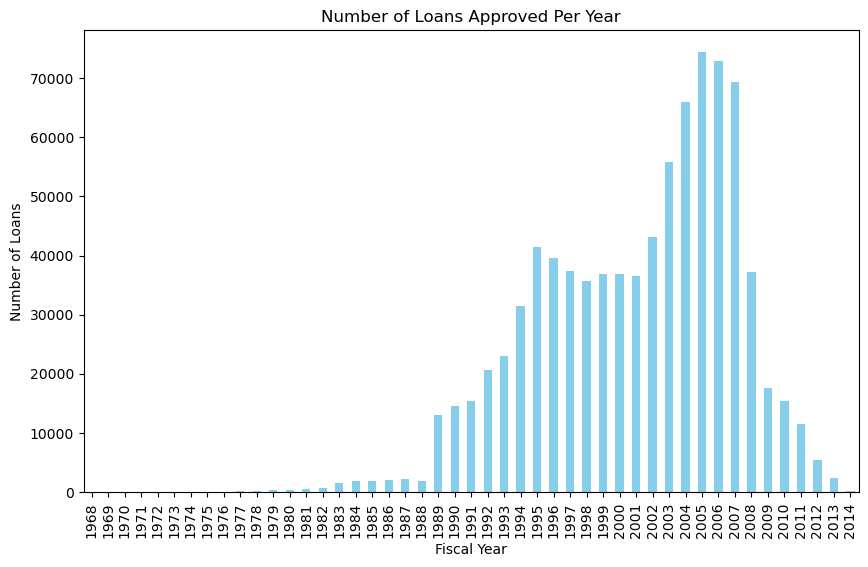

In [50]:
# Plot loans approved per year
loans_per_year = df['ApprovalFY'].value_counts().sort_index()
loans_per_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Loans Approved Per Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
plt.show()

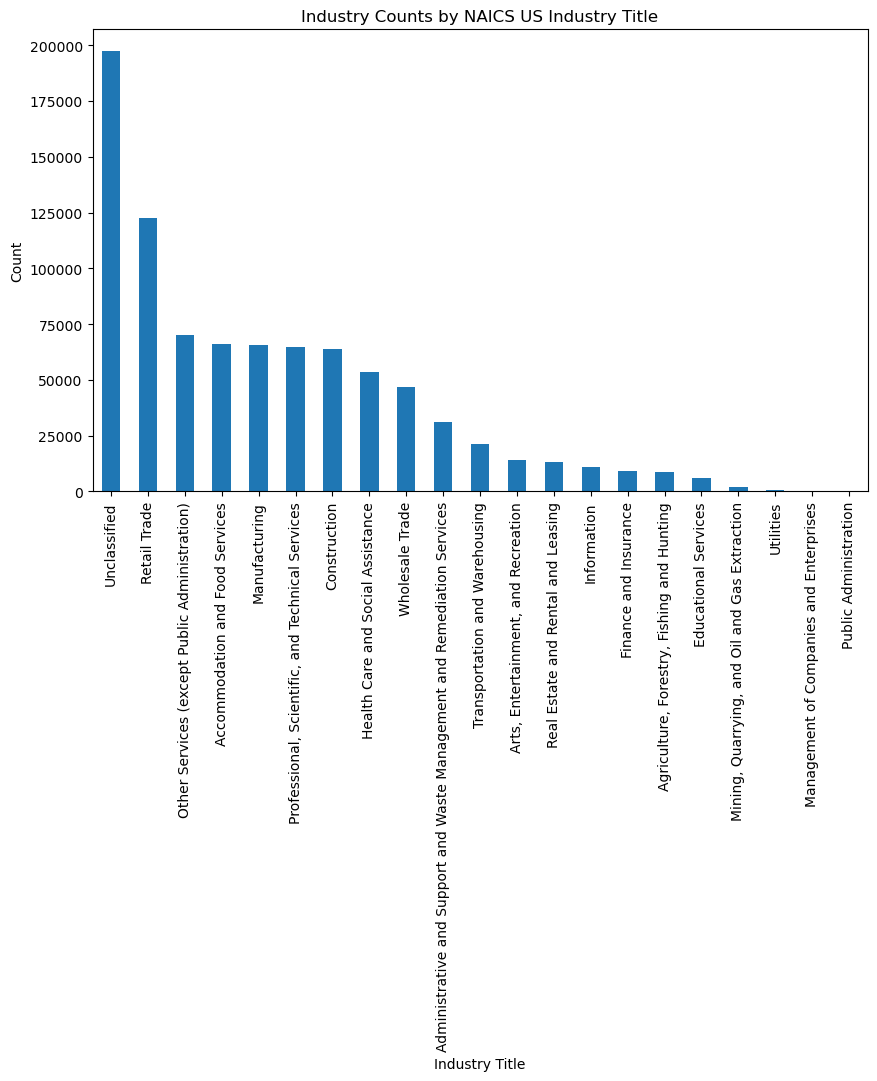

In [117]:
industry_counts = df['NAICS_US_Industry_Title'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar')
plt.title('Industry Counts by NAICS US Industry Title')
plt.xlabel('Industry Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


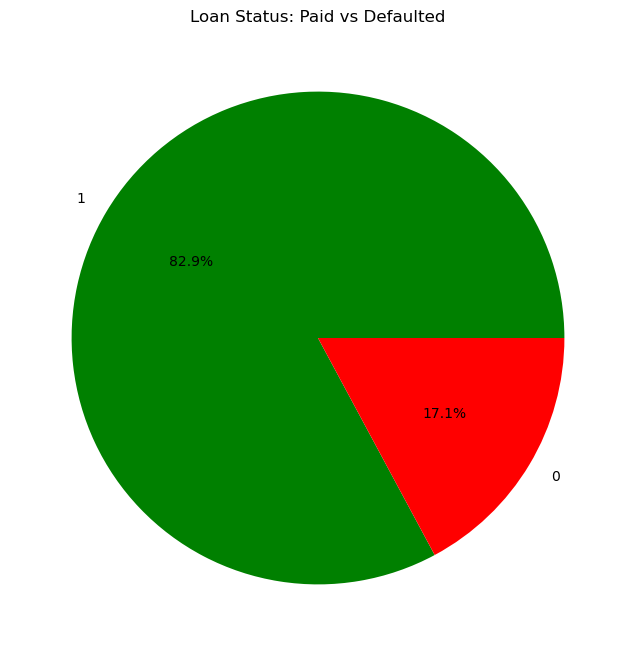

In [52]:
# Defaulted vs Paid Loans
status_counts = df['MIS_Status'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['green', 'red'])
plt.title('Loan Status: Paid vs Defaulted')
plt.ylabel('')
plt.show()

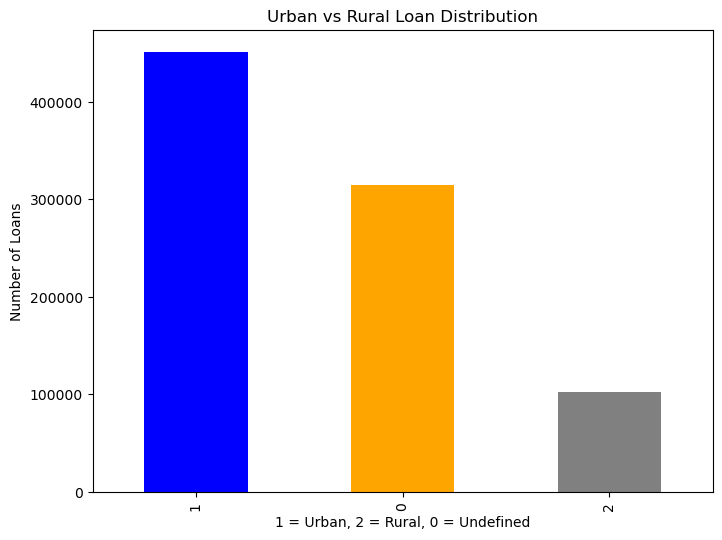

In [53]:
# Urban vs Rural distribution
urban_rural_counts = df['UrbanRural'].value_counts()
urban_rural_counts.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange', 'gray'])
plt.title('Urban vs Rural Loan Distribution')
plt.xlabel('1 = Urban, 2 = Rural, 0 = Undefined')
plt.ylabel('Number of Loans')
plt.show()

In [54]:
df

,ApprovalFY,Term,NoEmp,NewExist,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,NAICS_US_Industry_Title,Region,Loan_Age,Term_Years,ApprovalMonth
0,1997,84,4,2,0,0,1,48000,1,Retail Trade,Midwest,730,7.0,Feb
1,1997,60,2,2,0,0,1,32000,1,Accommodation and Food Services,Midwest,92,5.0,Feb
2,1997,180,7,1,0,0,0,215250,1,Health Care and Social Assistance,Midwest,306,15.0,Feb
3,1997,60,2,1,0,0,1,28000,1,Unclassified,South,122,5.0,Feb
4,1997,240,14,1,0,0,0,229000,1,Unclassified,South,75,20.0,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,1997,60,6,1,0,0,0,56000,1,Retail Trade,Midwest,215,5.0,Feb
899160,1997,60,6,1,0,1,0,42500,1,Retail Trade,Midwest,246,5.0,Feb
899161,1997,108,26,1,0,0,0,225000,1,Manufacturing,West,215,9.0,Feb
899162,1997,60,6,1,0,0,1,60000,0,Unclassified,West,32,5.0,Feb


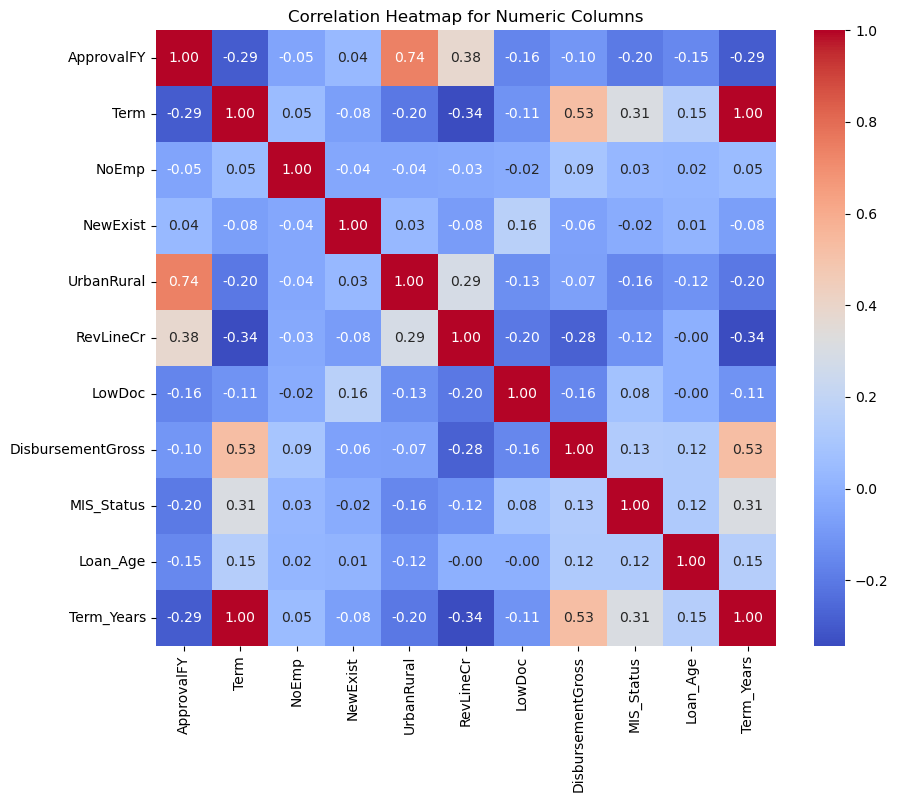

In [55]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Show the plot
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()


In [56]:
df = df.drop(['Term_Years', 'Loan_Age', 'ApprovalFY'], axis=1)
df_with_dummies = df_with_dummies.drop(['Term_Years', 'Loan_Age', 'ApprovalFY'], axis=1)


In [57]:
df.to_csv('cleaned_dataset.csv', index=False)
df_with_dummies.to_csv('cleaned_dataset_with_dummies.csv', index=False)

In [58]:
df

,Term,NoEmp,NewExist,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,NAICS_US_Industry_Title,Region,ApprovalMonth
0,84,4,2,0,0,1,48000,1,Retail Trade,Midwest,Feb
1,60,2,2,0,0,1,32000,1,Accommodation and Food Services,Midwest,Feb
2,180,7,1,0,0,0,215250,1,Health Care and Social Assistance,Midwest,Feb
3,60,2,1,0,0,1,28000,1,Unclassified,South,Feb
4,240,14,1,0,0,0,229000,1,Unclassified,South,Feb
...,...,...,...,...,...,...,...,...,...,...,...
899159,60,6,1,0,0,0,56000,1,Retail Trade,Midwest,Feb
899160,60,6,1,0,1,0,42500,1,Retail Trade,Midwest,Feb
899161,108,26,1,0,0,0,225000,1,Manufacturing,West,Feb
899162,60,6,1,0,0,1,60000,0,Unclassified,West,Feb
